# Loaded dice distributions

What if we can't observe a single roll. What if the dice get rolled, in this case, in sets of 10 at a time, and all we have is the total. The distribution of a `10d6` is not trivial! 

In fact, it is probably easier to calculate this distribution numerically rather than doing it analytically.

****

**What if we don't know the analytic distribution?**

Here we'll briefly look at the Kolmogorov-Smirnov test. But please note, it is meant for *continuous* distributions, I am using it on a discrete one simply to make it similar to previous examples, but you wouldn't do this if you wanted confidence in the results. In fact, the reason we are using 10 dice added together is to make our discrete distribution continuous enough.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rolls_obs = np.loadtxt("data\loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs, return_counts=True)
count_obs = count_obs / count_obs.sum()  # Noramlise

In [2]:
rolls_fair = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(rolls_fair, return_counts=True)
count_fair = count_fair / count_fair.sum()  # Noramlise

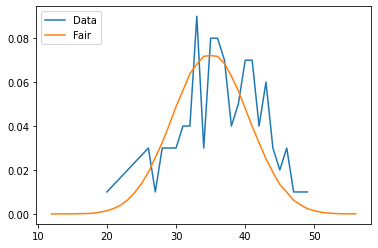

In [3]:
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair")
plt.legend()
plt.legend(loc=2);

This looks really messy. So here's a first tip when you're comparing distributions. If you compare the PDF, you have to bin the results and its hard to get insights unless you have a *lot* of data.

Instead, plot the CDF. You don't need to bin the data anymore.

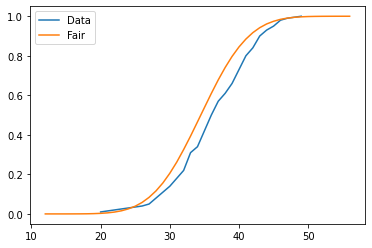

In [4]:
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label="Data")
plt.plot(unique2, cdf_fair, label="Fair")
plt.legend(loc=2);

In [5]:
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs, rolls_fair)
print(f"KS test statistic of {statistic:.3f}, p-value of {pvalue:.3f}")

KS test statistic of 0.137, p-value of 0.043


# Anderson-Darling Test

An improvement on the KS test that gives more weight to the tails of the distribution (whilst the K-S test gives more weight in the center). The default test requires testing against analytic distributions (like the KS test), however you can also test two observed distributions.

In [6]:
from scipy.stats import anderson_ksamp
statistic, critical_values, sig_level = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, sig-level of {sig_level:.9f}")
print(f"Test critical values are {critical_values}")
print("Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")

AD test statistic of 5.51558, sig-level of 0.002276517
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]


Here are a list of use cases in which I recommend people use the KS test over the AD test:

.

.

.

(Yes, this is delibrately empty. Just use the AD test.)